LAB ASSIGNMENTS Module 3: Deep Learning & Natural Language Processing OpenCV

 1. Perform Color Detection activities using OpenCV library: 
        A. Use appropriate pre-processing Techniques on any input RGB image/images. B. Display histogram using matplotlib with respect to each color of the image. 
        C. Save the Hist values for further use (use any picture of your choosing).

In [1]:
#!pip install opencv-python


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

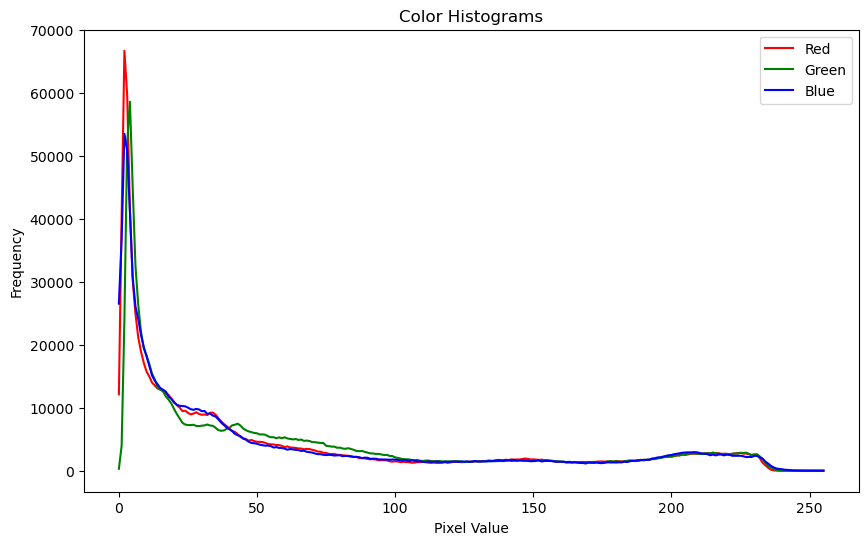

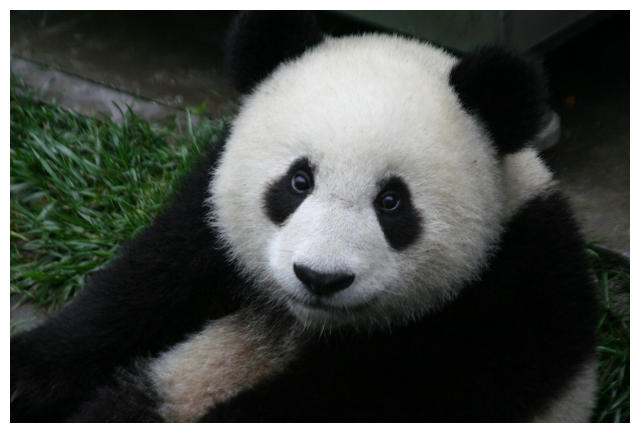

In [3]:


# Step 1: Loading an RGB image
image = cv2.imread(r'D:\1_AJINKYA_PAWAR\3_SOFTWARE JOB\1_CDAC\3_AI_Course\Lab_Assignment_Module_3_Solutions\1280px-Giant_Panda_2.jfif')  # Replace 'your_image.jpg' with the path to your image

# Step 2: Pre-processing
# Convert the image to the RGB color space (if it's not already in this format)
if image is not None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
else:
    print("Image not found. Make sure to provide the correct image path.")
    exit()

# Step 3: Displaying the histogram for each color channel
# Split the image into its RGB channels
r_channel, g_channel, b_channel = cv2.split(image)

# Calculating histograms for each channel
r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

# Plotting the histograms
plt.figure(figsize=(10, 6))
plt.title("Color Histograms")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(r_hist, color='red', label='Red')
plt.plot(g_hist, color='green', label='Green')
plt.plot(b_hist, color='blue', label='Blue')
plt.legend()

# Step 4: Saving histogram values for further use
np.savez('hist_values.npz', r_hist=r_hist, g_hist=g_hist, b_hist=b_hist)

# Displaying the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()


2. Write a code to draw the contours on above used image/images with respect to specific color identified within that particular image. Use the Hist value saved in earlier example.

In [ ]:




# Load the saved histogram values
hist_data = np.load('hist_values.npz')
r_hist = hist_data['r_hist']
g_hist = hist_data['g_hist']
b_hist = hist_data['b_hist']

# Define the lower and upper bounds for the specific color you want to identify
# Here, we'll identify the color red, but you can change these values for your specific color
lower_bound = np.array([0, 0, 150])  # Lower bound for red color in BGR format
upper_bound = np.array([100, 100, 255])  # Upper bound for red color in BGR format

# Create a mask to identify the specific color in the image
mask = cv2.inRange(image, lower_bound, upper_bound)

# Apply Gaussian blur for smoothing
blurred = cv2.GaussianBlur(mask, (5, 5), 0)

# Apply thresholding to create a binary image
_, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)  # Contours will be drawn in green (0, 255, 0)

# Display the image with the drawn contours
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

